# DETECTR 004 Analysis
This notebook is for formatting, analyzing and plotting the DETECTR_004 data. 

## Objective
Test all gRNAs for TB DETECTR and see if any fail

## Formatting to CSV file
Take txt file from plate reader and turn into tidy data format

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in CSV file
DETECTR_raw = pd.read_csv("../raw_txt_files/DETECTR_004.txt", encoding='utf-16', sep="\t", delimiter="\t",index_col=None, skiprows= 3,header = None)

In [3]:
DETECTR_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,00:00:00,36.9,2.547,2.783,2.252,2.783,2.518,2.801,2.930,2.754,...,2.635,2.786,2.615,3.089,2.557,3.326,2.744,2.869,NaN,NaN
1,NaN,NaN,3.124,2.882,2.858,2.694,2.721,2.706,2.744,2.992,...,2.864,2.904,2.942,2.963,2.846,3.048,3.052,2.897,NaN,NaN
2,NaN,NaN,2.466,2.769,2.438,2.825,3.107,2.806,2.483,2.654,...,2.688,2.939,2.660,3.139,2.872,3.146,2.829,3.045,NaN,NaN
3,NaN,NaN,3.242,2.744,3.043,2.651,2.725,2.644,2.750,2.864,...,2.991,2.882,3.005,2.899,3.069,3.122,3.101,3.114,NaN,NaN
4,NaN,NaN,2.479,3.036,2.601,2.855,2.304,2.574,2.437,2.748,...,2.508,2.734,2.599,3.006,2.717,3.093,2.837,3.041,NaN,NaN
5,NaN,NaN,3.192,2.950,2.846,2.254,2.675,2.635,2.620,2.821,...,2.887,2.529,2.906,2.895,3.177,3.124,3.282,3.238,NaN,NaN
6,NaN,NaN,2.756,2.671,2.510,2.599,2.126,2.630,2.838,2.605,...,2.566,2.547,2.382,2.838,2.779,2.950,3.057,3.233,NaN,NaN
7,NaN,NaN,3.034,2.856,2.767,2.690,2.752,2.539,2.542,2.817,...,2.959,2.778,2.848,2.959,3.112,2.956,3.307,3.195,NaN,NaN
8,NaN,NaN,2.628,2.821,2.603,2.641,2.142,2.386,2.118,2.839,...,2.457,2.694,2.388,2.850,2.814,2.932,2.963,2.977,NaN,NaN
9,NaN,NaN,3.035,2.825,2.812,2.598,3.337,2.654,2.717,2.726,...,2.792,2.821,2.599,2.888,2.942,2.955,3.113,3.345,NaN,NaN


In [4]:
#drop unnecessary rows at the end of the csv
DETECTR_raw = DETECTR_raw.drop(list(range(len(DETECTR_raw)-5, len(DETECTR_raw))), axis=0)

In [5]:
#select only the first columns
DETECTR_raw = DETECTR_raw.iloc[:,0:26]

In [6]:
#how many plate reads did we have?
len(DETECTR_raw)/16

145.0

In [7]:
#set a variable to identify the number of plate reads
num_plate_reads = int(len(DETECTR_raw)/16)

In [10]:
#create a dictionary mapping the row number to a letter for 384 and 96
well_dict_384 = {1:"A",2:"B",3:"C",4:"D",5:"E",6:"F",7:"G",8:"H",9:"I",10:"J",11:"K",12:"L",13:"M",14:"N",15:"O",16:"P"}
well_dict_96 = {1:"A",2:"A",3:"B",4:"B",5:"C",6:"C",7:"D",8:"D",9:"E",10:"E",11:"F",12:"F",13:"G",14:"G",15:"H",16:"H"}

In [11]:
#initialize the cleaned data frame
DETECTR_cleaned = pd.DataFrame(columns = ['time','row_384','column_384', 'row_96','column_96','rfu_value'])

In [12]:
DETECTR_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,00:00:00,36.9,2.547,2.783,2.252,2.783,2.518,2.801,2.930,2.754,...,2.706,2.721,2.635,2.786,2.615,3.089,2.557,3.326,2.744,2.869
1,NaN,NaN,3.124,2.882,2.858,2.694,2.721,2.706,2.744,2.992,...,2.919,2.980,2.864,2.904,2.942,2.963,2.846,3.048,3.052,2.897
2,NaN,NaN,2.466,2.769,2.438,2.825,3.107,2.806,2.483,2.654,...,2.485,2.862,2.688,2.939,2.660,3.139,2.872,3.146,2.829,3.045
3,NaN,NaN,3.242,2.744,3.043,2.651,2.725,2.644,2.750,2.864,...,2.919,2.672,2.991,2.882,3.005,2.899,3.069,3.122,3.101,3.114
4,NaN,NaN,2.479,3.036,2.601,2.855,2.304,2.574,2.437,2.748,...,2.326,2.810,2.508,2.734,2.599,3.006,2.717,3.093,2.837,3.041
5,NaN,NaN,3.192,2.950,2.846,2.254,2.675,2.635,2.620,2.821,...,2.687,2.753,2.887,2.529,2.906,2.895,3.177,3.124,3.282,3.238
6,NaN,NaN,2.756,2.671,2.510,2.599,2.126,2.630,2.838,2.605,...,2.391,2.778,2.566,2.547,2.382,2.838,2.779,2.950,3.057,3.233
7,NaN,NaN,3.034,2.856,2.767,2.690,2.752,2.539,2.542,2.817,...,2.940,2.554,2.959,2.778,2.848,2.959,3.112,2.956,3.307,3.195
8,NaN,NaN,2.628,2.821,2.603,2.641,2.142,2.386,2.118,2.839,...,2.435,2.729,2.457,2.694,2.388,2.850,2.814,2.932,2.963,2.977
9,NaN,NaN,3.035,2.825,2.812,2.598,3.337,2.654,2.717,2.726,...,3.062,2.705,2.792,2.821,2.599,2.888,2.942,2.955,3.113,3.345


In [13]:
#iterate over each plate to create a dataframe with the correct time, the 384 and 96 position and the RFU_value
for i in list(range(0,num_plate_reads)):
    time = DETECTR_raw.iloc[i*16,0]
    for j in list(range(2, 26)):
        for k in list(range(i*16, i*16+16)):
            rfu_value = DETECTR_raw.loc[k,j]
            row_384 = well_dict_384[k%16+1]
            column_384 = j-1
            row_96 = well_dict_96[k%16+1]
            column_96 = j // 2
            DETECTR_cleaned.loc[len(DETECTR_cleaned)] = [time, row_384, column_384,row_96,column_96,rfu_value]

In [14]:
#how many rows in our data frame now? should be 384*number of plates
len(DETECTR_cleaned)

55680

In [269]:
#write this file to a CSV
DETECTR_cleaned.to_csv("../DETECTR_004_tidy.csv")

## Filter the data frame
Select only wells we are interested in

In [24]:
#only select rows with the 6 hour time point 
#(this was the point in which most samples hadn't dried out yet, but had peaked)
DETECTR_6hr = DETECTR_cleaned.loc[DETECTR_cleaned["time"]=="06:00:00"]

In [25]:
#select only wells in quadrant A1
DETECTR_6hr = DETECTR_6hr.loc[(DETECTR_6hr["column_384"]%2 == 1) & (DETECTR_6hr["row_384"].isin(['A','C','E','G','I','K','M','O']))]

In [29]:
#identify the background fluorescent which is our negative control (Well O23)
background = DETECTR_6hr.loc[(DETECTR_6hr["column_384"] == 23) & (DETECTR_6hr["row_384"] == "O")]['rfu_value']
background

28014    2.835
Name: rfu_value, dtype: float64

In [32]:
#subtract that value from the rfu_value for each well and add to a new column
DETECTR_6hr['rfu_value_bkgrd_sub'] = DETECTR_6hr['rfu_value'].map(float) - list(background)

In [33]:
DETECTR_6hr['rfu_value_bkgrd_sub']

27648    3.456
27650    1.026
27652    1.872
27654    5.780
27656    0.688
27658    3.848
27660    1.546
27662    0.931
27680    3.612
27682    3.751
27684    1.457
27686    2.196
27688    2.953
27690    1.438
27692    2.928
27694    6.238
27712    3.594
27714   -0.032
27716    1.874
27718    2.242
27720    0.484
27722    1.965
27724    6.016
27726    3.809
27744    3.806
27746    0.778
27748    1.521
27750    5.617
27752    2.705
27754    0.684
         ...  
27908    0.364
27910    3.635
27912    1.700
27914    0.722
27916    5.419
27918    7.486
27936    1.895
27938    4.625
27940    3.369
27942    0.859
27944   -0.683
27946    3.686
27948    7.975
27950    5.739
27968    2.387
27970    0.722
27972    3.356
27974    1.618
27976    1.674
27978    4.564
27980   -0.270
27982    1.342
28000    3.539
28002    0.952
28004    3.842
28006    4.079
28008    6.850
28010    1.551
28012    5.268
28014    0.000
Name: rfu_value_bkgrd_sub, Length: 96, dtype: float64

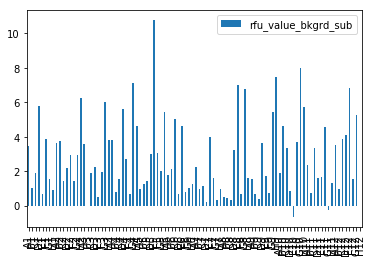

In [34]:
#plot the background subtracted RFU_values for each well as a barplot
DETECTR_6hr.plot(x = DETECTR_6hr['row_96'] + DETECTR_6hr['column_96'].map(str), y= 'rfu_value_bkgrd_sub', kind = 'bar')

In [36]:
#which rfu are less than the background?
DETECTR_6hr.loc[DETECTR_6hr['rfu_value_bkgrd_sub']<0]

,time,row_384,column_384,row_96,column_96,rfu_value,rfu_value_bkgrd_sub
27714,06:00:00,C,5,B,3,2.803,-0.032
27944,06:00:00,I,19,E,10,2.152,-0.683
27980,06:00:00,M,21,G,11,2.565,-0.270


## Conclusions
all guides work, with a few failures -  B3, E10 and G11